# Customer Churn Prediction

ใช้ PyCaret ในการสร้าง Customer Churn Prediction Model

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

### Load data

In [2]:
#Read csv data
df=pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Convert / Data Cleansing

In [55]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot:xlabel='Churn', ylabel='count'>

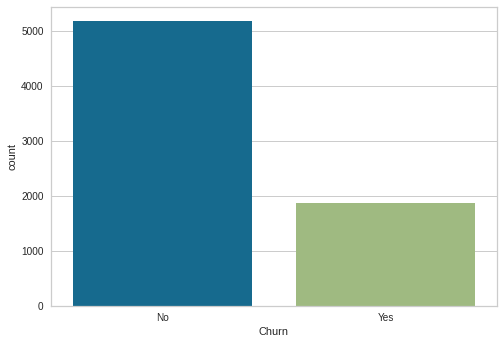

In [50]:
sns.countplot(x='Churn', data=df)

โดยข้อมูลที่เราต้องการ Predict คือ Column Churn ที่หมายถึงตัวที่ระบุว่า ลูกค้าเลิกซื้อสินค้าหรือไม่ Yes = ยกเลิก, No = ไม่ยกเลิก ถ้าดูกราฟ จะเห็นว่า Data เป็น Imbalance Dataset หรือ Yes / No มีจำนวน Record ที่แตกต่างกันนั่นเอง

### PyCaret Setup

Clean data พอเป็นพิธี เดี๋ยวเรามาลองใช้ PyCaret ในการสร้าง Model ดูครับ ใช้ Code ข้างล่าง แล้วก็ตรวจสอบ Data Type ถ้า OK แล้วก็กด Enter ในกล่อง input ใต้ ตารางครับ ตัว PyCaret ก็จะเริ่ม Train Model ให้เราทันที (ตรงกล่องสีฟ้าๆ ในรูป)

ถ้าสังเกตใน setup ผมใส่ Parameter ให้ทำการ normalize data ด้วย ให้ Remove outlier แก้ไข imbalance data และให้ ignore field customerID ที่ไม่ได้มีผลต่อการ Train Model ครับ

In [57]:
# init setup
from pycaret.classification import *
s = setup(df, 
          target = 'Churn', 
          normalize=True,
          remove_outliers=True, 
          fix_imbalance=True, 
          ignore_features = ['customerID'])

,Description,Value
0,session_id,4840
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 21)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


### Evaluate Model Performance
คราวนี้เรามาดูผลลัพธ์ของ แต่ละ Model กันครับ ในตัวอย่างนี้จะดู F1 Score เป็นหลัก เพราะ data เป็น imbalance dataset โจทย์นี้ Recall & Presicion สำคัญครับ โดยใช้คำสั่ง

In [58]:
# compare all models
best_model = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7758,0.8470,0.7352,0.5684,0.6407,0.4816,0.4906,0.0720
lr,Logistic Regression,0.7536,0.8445,0.7947,0.5322,0.6371,0.4614,0.4833,0.2010
lda,Linear Discriminant Analysis,0.7476,0.8412,0.7869,0.5250,0.6293,0.4494,0.4712,0.0220
ridge,Ridge Classifier,0.7465,0.0000,0.7845,0.5237,0.6277,0.4470,0.4686,0.0180
gbc,Gradient Boosting Classifier,0.7850,0.8426,0.6663,0.5939,0.6275,0.4771,0.4792,0.1900
nb,Naive Bayes,0.7361,0.8309,0.7908,0.5105,0.6202,0.4321,0.4568,0.0170
svm,SVM - Linear Kernel,0.7224,0.0000,0.8063,0.5035,0.6123,0.4170,0.4538,0.0270
lightgbm,Light Gradient Boosting Machine,0.7850,0.8321,0.5966,0.6079,0.6010,0.4541,0.4550,0.0950
rf,Random Forest Classifier,0.7845,0.8240,0.5794,0.6103,0.5937,0.4474,0.4482,0.2210
knn,K Neighbors Classifier,0.6925,0.7662,0.7376,0.4602,0.5665,0.3475,0.3712,0.0550


ถ้าดูจากรูป จะเห็นว่า Model ที่ได้ค่า F1 สูงที่สุดคือ Ada Boost Classifier ครับ ได้ F1 Score = 0.6407

In [59]:
# print best_model parameters
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=4840)


### Hyper Parameter Tuning
โดยที่ PyCaret ยังสามารถช่วยให้เราทำ Hyper Parameter Tuning ได้ง่ายๆ ด้วยเช่นกัน

In [60]:
# tune best model
tuned_best_model = tune_model(estimator=best_model, optimize="F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7676,0.8285,0.6953,0.5597,0.6202,0.4556,0.4611
1,0.7804,0.8610,0.8047,0.5691,0.6667,0.5100,0.5270
2,0.7932,0.8694,0.7891,0.5906,0.6756,0.5284,0.5403
3,0.7885,0.8520,0.7244,0.5897,0.6502,0.5008,0.5063
4,0.7543,0.8139,0.6378,0.5400,0.5848,0.4120,0.4149
5,0.7756,0.8309,0.7087,0.5696,0.6316,0.4730,0.4788
6,0.7671,0.8382,0.7188,0.5576,0.6280,0.4624,0.4703
7,0.7735,0.8471,0.6719,0.5733,0.6187,0.4590,0.4620
8,0.7885,0.8483,0.7500,0.5890,0.6598,0.5095,0.5173
9,0.7970,0.8828,0.7734,0.6000,0.6758,0.5314,0.5405


หลังการทำ Hyper Parameter Tuning ตัว F1 เพิ่มขึ้นนิดหน่อย จาก 0.6407 เป็น 0.6411 ใช้ได้ๆ เขียนโค้ด บันทัดเดียว

In [73]:
plot_model(tuned_best_model, plot="parameter")

,Parameters
algorithm,SAMME.R
base_estimator,None
learning_rate,0.4
n_estimators,190
random_state,4840


### Model Performance
นอกจากนั้นยังไม่พอนะครับ PyCaret ยังสามารถ Plot graph Model Performace ให้เราดูได้ง่ายๆ ด้วย ไม่ว่าจะเป็น AUC Curve, Confusion Matrix, Feature Importance และอื่นๆ อีกมากครับ

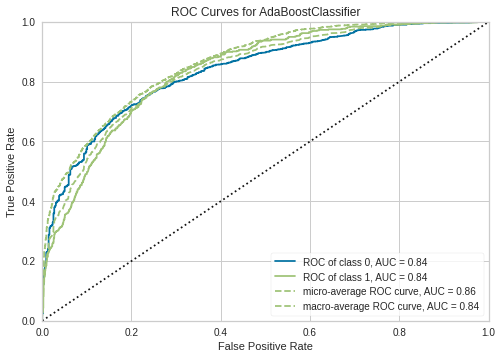

In [61]:
# AUC Plot
plot_model(tuned_best_model, plot = 'auc')

AUC ของแต่ละ Class ได้ 0.84 ถือว่า Model ทำงานได้ดีเลยครับ

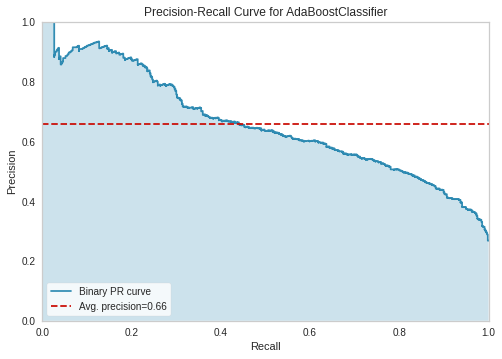

In [74]:
plot_model(tuned_best_model, plot="pr")

Precision - Recall Curve ได้ค่าเฉลี่ย 0.66 ก็ถือว่า ok เลย่นะครับ

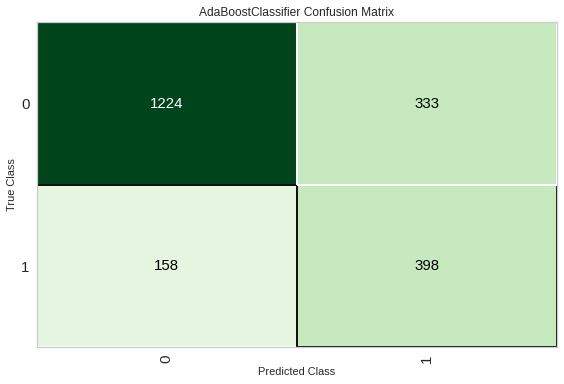

In [75]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

* ช่องซ้ายบน เราทาย ไม่ Churn และ ไม่ Churn จริงๆ (actual = prediction)
* ช่องขวาล่าง เราทาย Churn และ Churn จริงๆ (actual = prediction)
* เรามีทายผิดอยู่สองช่อง ด้านขวาบนและซ้ายล่าง (actual ≠ prediction)
* ขวาบนคือ เราทายว่า Churn แต่จริงๆ แล้วไม่ Churn 333
* ซ้ายล่าง คือ เราทายว่า ไม่ Churn แต่จริงๆ แล้ว Churn 158

ถ้าดู Confusion Matrix จะเห็นว่า มี 333 คนที่ Model Predict ว่า Churn แต่จริงๆ แล้ว ไม่ Churn แต่ถ้า Predict ว่าใครจะไม่ Churn บ้างนี้ ค่อนข้างแม่นเลยครับ ทายถูก 1224 คน
แต่ถ้าดูจริงๆ แล้ว มีถึง 398 คนที่ Model ทำนายว่าลูกค้าจะยกเลิกสัญญา และยกเลิกจริงๆ ซึ่งถ้าหากเราทำ Campaign ส่งเสริมการขาย ให้กับลูกค้ากลุ่มนี้ จะทำให้เราสามารถ บริหารจัดการค่าใช้จ่ายได้ง่ายขึ้น โดยที่เราไม่จำเป็นต้องทำกับลูกค้าทุกคน

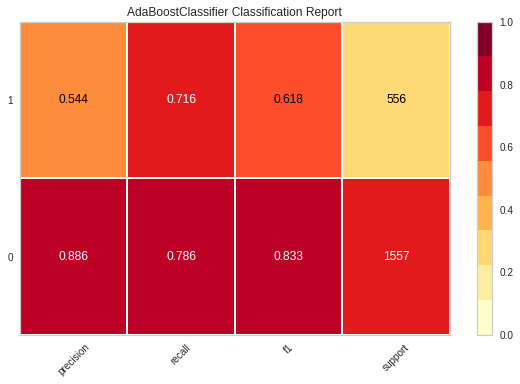

In [76]:
plot_model(tuned_best_model, plot="class_report")

โมเดลทำงานได้ค่อนข้างดี แต่ Precision 0.544 ในการ Preduct ว่าลูกค้าจะ Churn

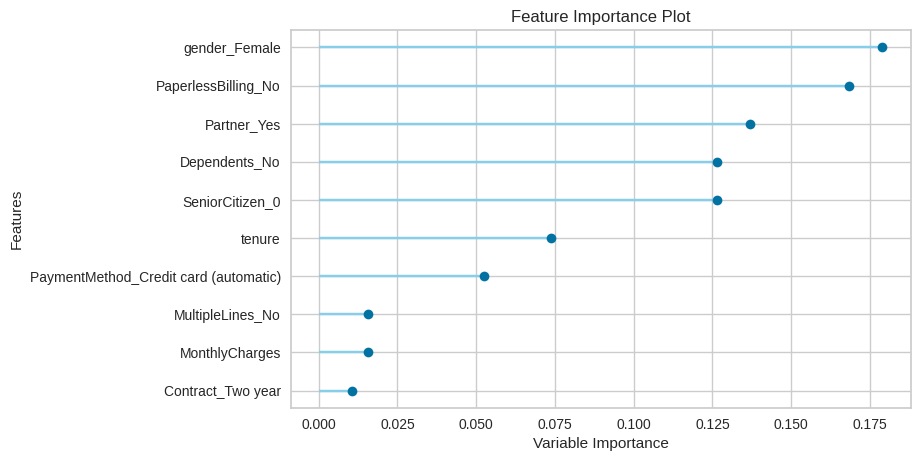

In [77]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')

นอกจากนั้นยังไม่พอ เรายังสามารถ Plot Feature Importance ได้ง่ายเลยครับ 

จะเห็นว่า Feature ที่มีผลต่อการ ยกเลิก หรือ Churn คือ gender_Female, PaperlessBilline_No อันนี้ก็สามารถเอาไปวิเคราะห์เชิงลึกต่อได้ว่า ถ้าลูกค้าเปลี่ยนมาใช้ Paperless Billing แล้วจะทำให้ลูกค้าใช้บริการต่อ เราก็สามารถ Push marketing activity ต่อไปได้ เป็นต้น

In [71]:
predict_model(tuned_best_model);



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7676,0.8376,0.7158,0.5445,0.6185,0.4558,0.4647


ถือว่าใช้ได้ครับ สำหรับ PyCaret สามารถช่วยลดเวลาในการเขียน Code ได้เยอะเลย